# Importing necessary libraries

In [2]:
# Load libraries for analysis and visualization
import pandas as pd # collection of functions for data processing and analysis modeled after R dataframes with SQL like features
from pandas import Series, DataFrame, concat
import numpy as np  # foundational package for scientific computing
import matplotlib.pyplot as plt # Collection of functions for scientific and publication-ready visualization
%matplotlib inline
import seaborn as sns  # Visualization library based on matplotlib, provides interface for drawing attractive statistical graphics

# Machine learning libraries
import sklearn         # Collection of machine learning algorithms
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report, precision_recall_curve, confusion_matrix

# Loading Dataset

In [3]:
df = pd.read_csv("/Users/pawansapkota/downloads/iris_dataset.csv")

# Show a few data points and info of each feature:


In [4]:
df[:10]


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


The above table describes the mean, standard-deviation, minimum value, first quartile, second quartile(Mean), third quartile and maximum value of each features respectively.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


There are no any null values in features. All of them are of float type except class which is of object type.

# Lets see the visual analysis of the dataset

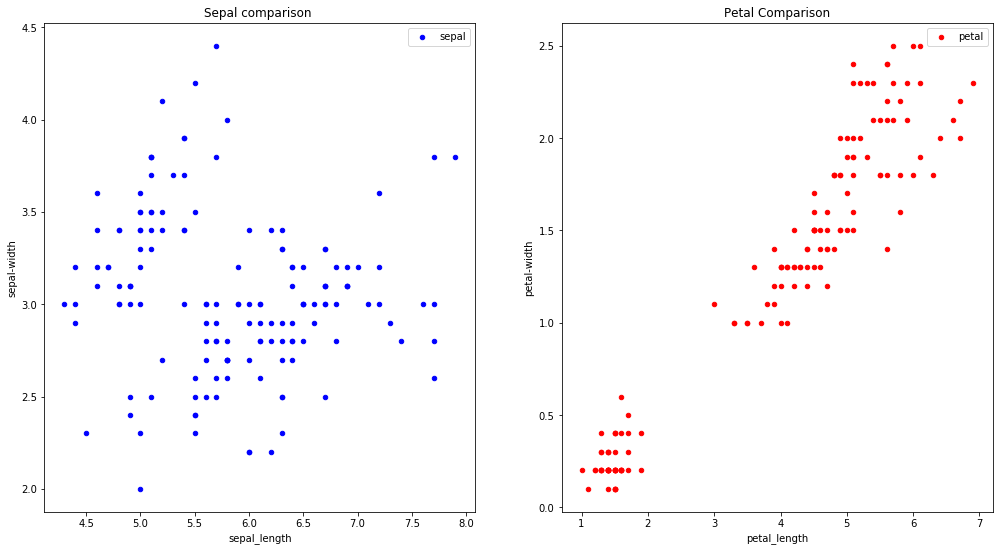

In [7]:
fig,ax=plt.subplots(1,2,figsize=(17, 9))
df.plot(x="sepal_length",y="sepal_width",kind="scatter",ax=ax[0],sharex=False,sharey=False,label="sepal",color='b')
df.plot(x="petal_length",y="petal_width",kind="scatter",ax=ax[1],sharex=False,sharey=False,label="petal",color='r')
ax[0].set(title='Sepal comparison ', ylabel='sepal-width')
ax[1].set(title='Petal Comparison',  ylabel='petal-width')
ax[0].legend()
ax[1].legend()

The first plot shows the scatter plot between length and width of the sepal. The average sepal length seems to be around 6cm and average sepal width seems to be around 3cm. The scatter plot in sepal width vs sepal length seems to be well distributed homogenously.

The second plot shows the comparison between legth and width of the petal. It shows that there are no petal having length between 2-3cm and width between 0.6- 1 cm approximately. The distribution of petal seems to be most dense between the length of 4-7cm and width of 1 - 2.5cm, approximately. The petal length and petal width seems to be in positive correlation.

In [8]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

There are three unique classes named as above.

In [9]:
print(df.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


The size of each clas is 50.

In [10]:
#Create 3 DataFrame for each Species
setosa=df[df['class']=='Iris-setosa']
versicolor =df[df['class']=='Iris-versicolor']
virginica =df[df['class']=='Iris-virginica']


<Figure size 432x288 with 0 Axes>

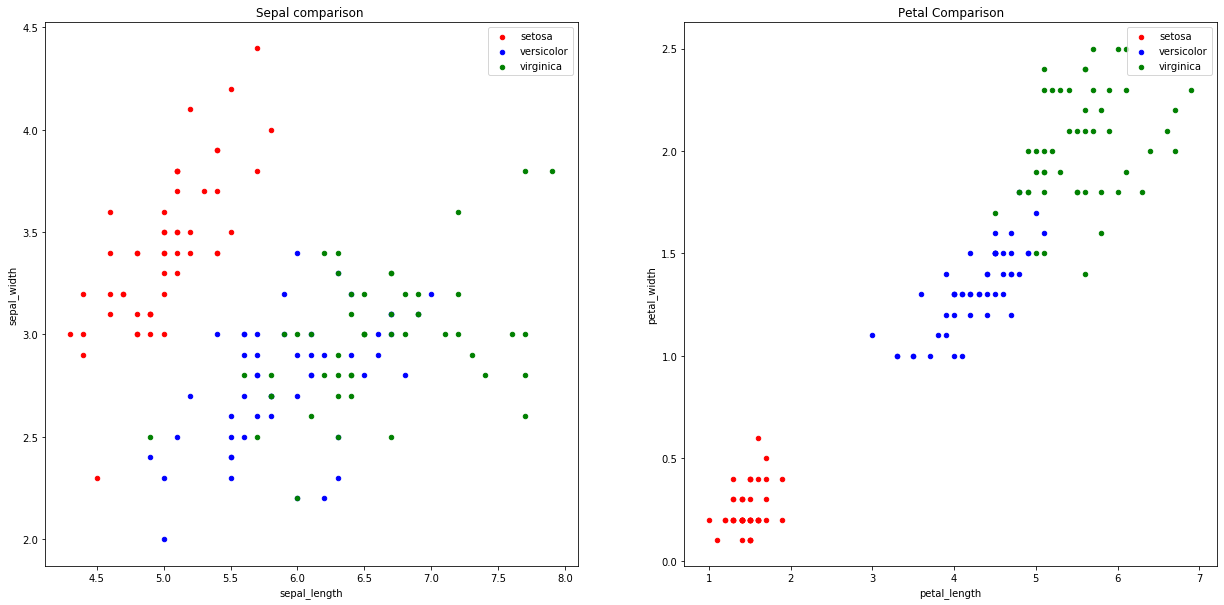

In [11]:
plt.figure()
fig,ax=plt.subplots(1,2,figsize=(21, 10))

setosa.plot(x="sepal_length", y="sepal_width", kind="scatter",ax=ax[0],label='setosa',color='r')
versicolor.plot(x="sepal_length",y="sepal_width",kind="scatter",ax=ax[0],label='versicolor',color='b')
virginica.plot(x="sepal_length", y="sepal_width", kind="scatter", ax=ax[0], label='virginica', color='g')

setosa.plot(x="petal_length", y="petal_width", kind="scatter",ax=ax[1],label='setosa',color='r')
versicolor.plot(x="petal_length",y="petal_width",kind="scatter",ax=ax[1],label='versicolor',color='b')
virginica.plot(x="petal_length", y="petal_width", kind="scatter", ax=ax[1], label='virginica', color='g')

ax[0].set(title='Sepal comparison ')
ax[1].set(title='Petal Comparison')
ax[0].legend()
ax[1].legend()

This is the sepal and petal comparison of all three classes. The distribution of petal length seems to be quite easily separable. While, in the case of sepal,  its easily separable for the setosa class but versicolor and virginica have a kind of mixed distribution. 

<Figure size 432x288 with 0 Axes>

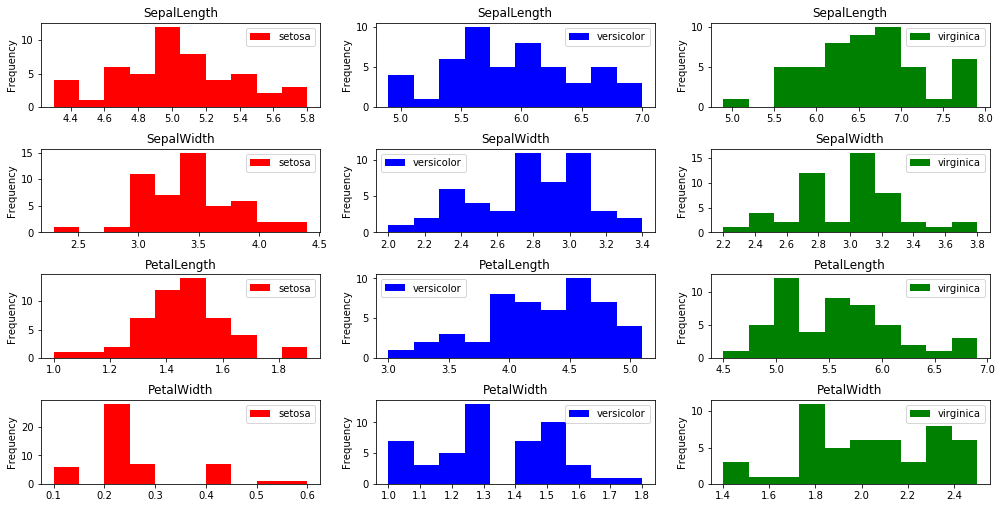

In [12]:
plt.figure()

fig,ax=plt.subplots(4,3,figsize=(17, 8))
setosa["sepal_length"].plot(kind="hist", ax=ax[0][0],label="setosa",color ='r',fontsize=10)
versicolor["sepal_length"].plot(kind="hist", ax=ax[0][1],label="versicolor",color='b',fontsize=10)
virginica["sepal_length"].plot( kind="hist",ax=ax[0][2],label="virginica",color='g',fontsize=10)

setosa["sepal_width"].plot(kind="hist", ax=ax[1][0],label="setosa",color ='r',fontsize=10)
versicolor["sepal_width"].plot(kind="hist", ax=ax[1][1],label="versicolor",color='b',fontsize=10)
virginica["sepal_width"].plot( kind="hist",ax=ax[1][2],label="virginica",color='g',fontsize=10)

setosa["petal_length"].plot(kind="hist", ax=ax[2][0],label="setosa",color ='r',fontsize=10)
versicolor["petal_length"].plot(kind="hist", ax=ax[2][1],label="versicolor",color='b',fontsize=10)
virginica["petal_length"].plot( kind="hist",ax=ax[2][2],label="virginica",color='g',fontsize=10)


setosa["petal_width"].plot(kind="hist", ax=ax[3][0],label="setosa",color ='r',fontsize=10)
versicolor["petal_width"].plot(kind="hist", ax=ax[3][1],label="versicolor",color='b',fontsize=10)
virginica["petal_width"].plot( kind="hist",ax=ax[3][2],label="virginica",color='g',fontsize=10)

plt.rcParams.update({'font.size': 10})
plt.tight_layout()

plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.5)

ax[0][0].set(title='SepalLength')
ax[0][1].set(title='SepalLength')
ax[0][2].set(title='SepalLength')
ax[1][0].set(title='SepalWidth')
ax[1][1].set(title='SepalWidth')
ax[1][2].set(title='SepalWidth')
ax[2][0].set(title='PetalLength')
ax[2][1].set(title='PetalLength')
ax[2][2].set(title='PetalLength')
ax[3][0].set(title='PetalWidth')
ax[3][1].set(title='PetalWidth')
ax[3][2].set(title='PetalWidth')

ax[0][0].legend()
ax[0][1].legend()
ax[0][2].legend()
ax[1][0].legend()
ax[1][1].legend()
ax[1][2].legend()
ax[2][0].legend()
ax[2][1].legend()
ax[2][2].legend()
ax[3][0].legend()
ax[3][1].legend()
ax[3][2].legend()


plt.show()
plt.close()


The above histogram diagrams shows the frequency comparison of sepal length, sepal width, petal length and petal width, for each of the three classes.

# Seaborn: statistical data visualization

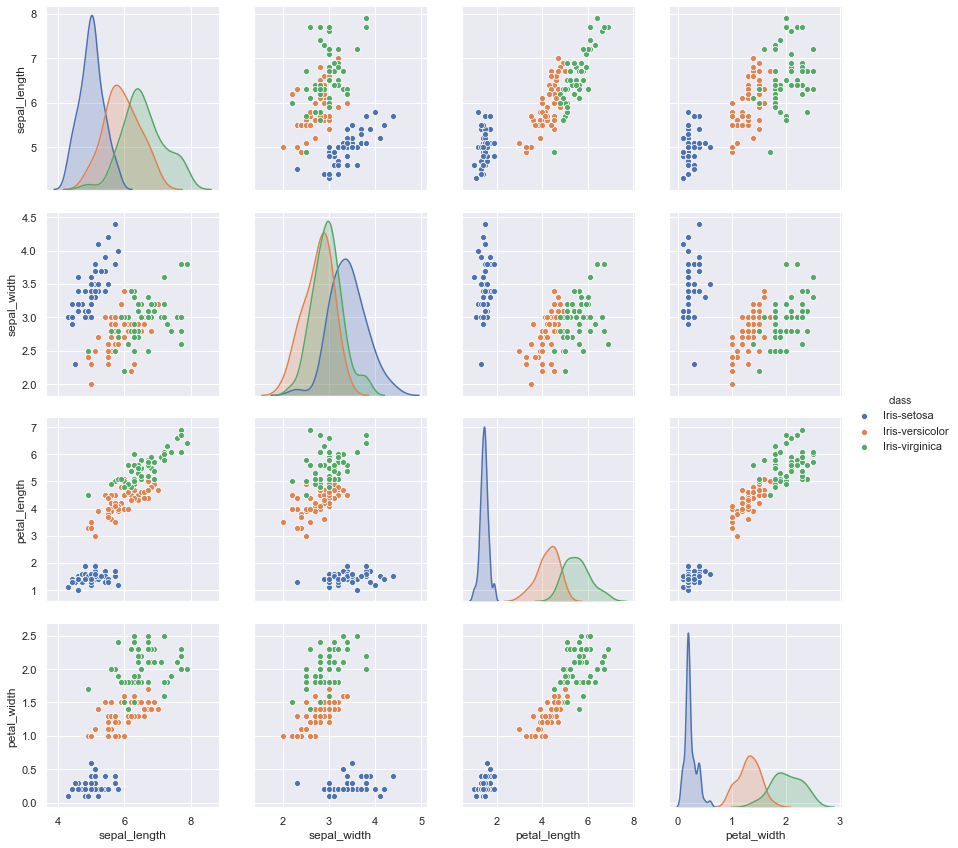

In [13]:
sns.set()
sns.pairplot(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']],
             hue="class", diag_kind="kde", height = 3)

The above plots show the different forms statistical visualization for  petal length, petal_width, sepal_length, sepal_width, from different perspective, for the each classes of flower.

# Mapping of classes

In [14]:
df['class'] = df['class'].map( {'Iris-setosa': 0, 'Iris-virginica': 1, 'Iris-versicolor': 2}).astype(int) 

# Separating label and splitting dataset into training and testing

In [15]:
data = df.drop("class", axis=1)
label = df["class"]
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data, label, test_size=0.3, random_state=101, shuffle = True)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((105, 4), (45, 4), (105,), (45,))

Here the 30% of the dataset is considered as testing data and 70% of the dataset is considered as training data.

In [16]:
for i in range(2,20):
        knn = KNeighborsClassifier(algorithm='auto', leaf_size=26, metric='minkowski',
                               metric_params=None, n_jobs=1, n_neighbors=i, p=2, 
                               weights='uniform')
        knn.fit(X_train, Y_train)
        y_pred = knn.predict(X_test)
        acc_knn = round(knn.score(X_test, Y_test) * 100, 2)
        print("The accuracy of KNN when the number of neighbour =", i, "is", acc_knn,"%") 
      


The accuracy of KNN when the number of neighbour = 2 is 97.78 %
The accuracy of KNN when the number of neighbour = 3 is 100.0 %
The accuracy of KNN when the number of neighbour = 4 is 97.78 %
The accuracy of KNN when the number of neighbour = 5 is 100.0 %
The accuracy of KNN when the number of neighbour = 6 is 97.78 %
The accuracy of KNN when the number of neighbour = 7 is 97.78 %
The accuracy of KNN when the number of neighbour = 8 is 97.78 %
The accuracy of KNN when the number of neighbour = 9 is 100.0 %
The accuracy of KNN when the number of neighbour = 10 is 97.78 %
The accuracy of KNN when the number of neighbour = 11 is 97.78 %
The accuracy of KNN when the number of neighbour = 12 is 97.78 %
The accuracy of KNN when the number of neighbour = 13 is 97.78 %
The accuracy of KNN when the number of neighbour = 14 is 97.78 %
The accuracy of KNN when the number of neighbour = 15 is 97.78 %
The accuracy of KNN when the number of neighbour = 16 is 97.78 %
The accuracy of KNN when the numb

The accuracy of KNN seems to be 100% when the number of neighbours is either 5,3 or 9. The accuracy seems to be quite high since the number of data points is small(150) and the classes are easily separable as well.

 ### Scaling the features (Normalizing the data) and then classifying using k-NN


In [18]:
from sklearn import preprocessing
scaler_train = preprocessing.StandardScaler().fit(X_train)
X_train_n = scaler_train.transform(X_train)

scaler_test = preprocessing.StandardScaler().fit(X_test)
X_test_n = scaler_test.transform(X_test)
for i in range(2,20):
    knn = KNeighborsClassifier(algorithm='auto', leaf_size=26, metric='minkowski', 
                               metric_params=None, n_jobs=1, n_neighbors=i, p=2, 
                               weights='uniform')
    knn.fit(X_train_n, Y_train)
    y_pred = knn.predict(X_test)
    acc_knn = round(knn.score(X_test_n, Y_test) * 100, 2)
    print("The accuracy of KNN when the number of neighbour =", i, "is", acc_knn,"%") 


The accuracy of KNN when the number of neighbour = 2 is 93.33 %
The accuracy of KNN when the number of neighbour = 3 is 97.78 %
The accuracy of KNN when the number of neighbour = 4 is 97.78 %
The accuracy of KNN when the number of neighbour = 5 is 97.78 %
The accuracy of KNN when the number of neighbour = 6 is 97.78 %
The accuracy of KNN when the number of neighbour = 7 is 97.78 %
The accuracy of KNN when the number of neighbour = 8 is 95.56 %
The accuracy of KNN when the number of neighbour = 9 is 95.56 %
The accuracy of KNN when the number of neighbour = 10 is 93.33 %
The accuracy of KNN when the number of neighbour = 11 is 95.56 %
The accuracy of KNN when the number of neighbour = 12 is 93.33 %
The accuracy of KNN when the number of neighbour = 13 is 93.33 %
The accuracy of KNN when the number of neighbour = 14 is 93.33 %
The accuracy of KNN when the number of neighbour = 15 is 93.33 %
The accuracy of KNN when the number of neighbour = 16 is 91.11 %
The accuracy of KNN when the numb

In [20]:
#Scaling features to a range
min_max_scaler_train = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler_train.fit_transform(X_train)

min_max_scaler_test = preprocessing.MinMaxScaler()
X_test_minmax = min_max_scaler_test.fit_transform(X_test)

knn = KNeighborsClassifier(algorithm='auto', leaf_size=26, metric='minkowski', 
                           metric_params=None, n_jobs=1, n_neighbors=9, p=1, 
                           weights='uniform')
knn.fit(X_train_minmax, Y_train)
y_pred = knn.predict(X_test_minmax)
acc_knn = round(knn.score(X_test_n, Y_test) * 100, 2)

print('Accuracy of k-NN is ',acc_knn, '%')

Accuracy of k-NN is  73.33 %


# PLOT MULTICLASS ROC-CURVE AND FIND THE AREA UNDER THE ROC

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
# Binarize the output
label_new = label_binarize(label, classes=[0, 1, 2])
n_classes = 3
X_train, X_test, y_train, y_test = train_test_split(data, label_new, test_size=.4,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(KNeighborsClassifier(algorithm='auto', leaf_size=26, metric='minkowski',
                               metric_params=None, n_jobs=1, n_neighbors=8, p=2,
                               weights='uniform'))
classifier.fit(X_train, y_train)
y_score = classifier.predict(X_test)
y_score_new = label_binarize(y_score, classes=[0,1,2])
n_classes= 3
acc_knn= round(classifier.score(X_test, y_test)*100, 2)
print('The accuracy of KNN is :',acc_knn,'%')

The accuracy of KNN is : 93.33 %


# Compute ROC curve and ROC area for each class


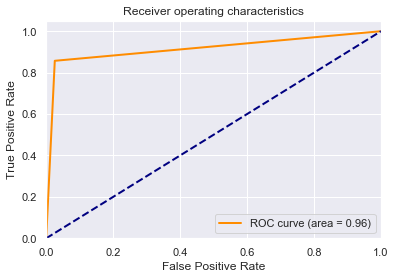

In [32]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_score_new[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score_new.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

# Roc-curve for all three classes

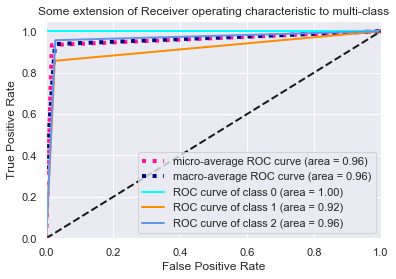

In [33]:
from scipy import interp
from itertools import cycle


y = label_binarize(label, classes=[0, 1, 2])
n_classes = 3
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# CONFUSION-MATRIX FOR ALL THREE CLASSES

In [34]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_test, y_score_new, sample_weight=None, labels=None, samplewise=False)

array([[[44,  0],
        [ 0, 16]],

       [[38,  1],
        [ 3, 18]],

       [[36,  1],
        [ 1, 22]]])

The above confusion matrix shows the comparison of actual class and predicted class.